<a href="https://colab.research.google.com/github/Luseat/dicoding_task_project_regession/blob/main/dicoding_task_project_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agar dataset lebih mudah dipahami, langkah pertama yang perlu kita lakukan adalah memuat datanya. Jangan lupa untuk mengimpor library pandas agar kita bisa membaca file data.

Jika menggunakan tools lain atau menyimpan data di Google Drive, pastikan untuk menyesuaikan path data yang sesuai.

In [15]:
import pandas as pd

df_train = pd.read_csv('/content/train.csv')
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [16]:
df_test = pd.read_csv('/content/test.csv')
df_test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


Jika diperhatikan data testing di atas tidaklah memiliki label atau target, hal ini bertujuan agar Anda dapat melakukan testing ketika model sudah berada di tahap produksi agar tidak terjadi error.

Hal ini menjadi wajar dalam situasi tertentu. Setelah model diuji dan dievaluasi, data testing tanpa label digunakan untuk membuat prediksi pada data baru yang belum diketahui. Data ini biasanya berasal dari dunia nyata sehingga model digunakan untuk membuat prediksi atau keputusan. Dalam kasus ini, memang tidak ada label karena data tersebut belum memiliki hasil aktual yang bisa dibandingkan.

# **Data Cleaning dan Transformation**

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Dengan melakukan analisis statistik deskriptif, kita bisa memastikan bahwa data yang digunakan untuk melatih model machine learning adalah data yang representatif, berkualitas tinggi, dan bebas dari masalah yang dapat memengaruhi hasil akhir.

In [18]:
# Menampilkan statistik deskriptif dari dataset
df_train.describe(include="all")

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [19]:
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]


,0


Outliers merupakan salah satu blocker dalam membangun model machine learning yang optimal. Hal ini bisa disebabkan oleh berbagai hal seperti kesalahan pengisian data, error yang terjadi ketika pengumpulan data, dan lain sebagainya.

Salah satu cara mengatasi outliers adalah dengan menggunakan metode IQR (Interquartile Range) adalah salah satu pendekatan yang efektif. IQR adalah rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam data. Nilai yang terletak di luar batas IQR dianggap sebagai outlier.

Mari kita periksa terlebih dahulu apakah dataset yang digunakan memiliki outlier atau tidak menggunakan kode berikut

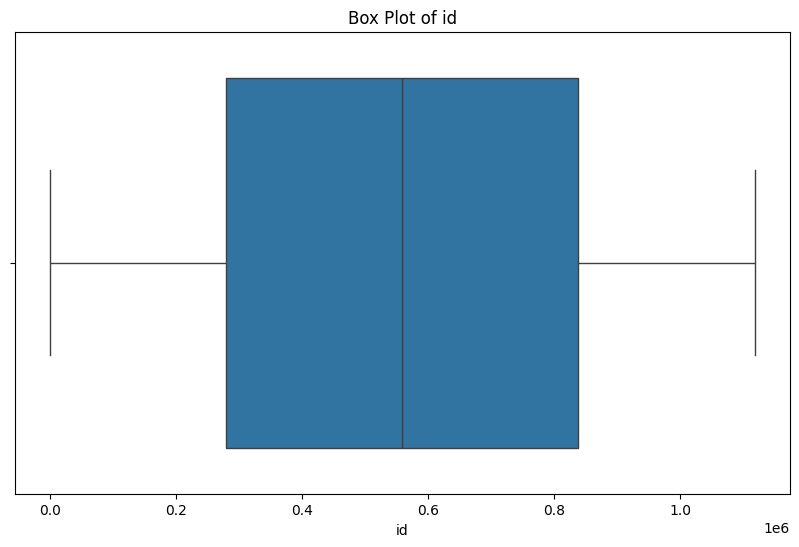

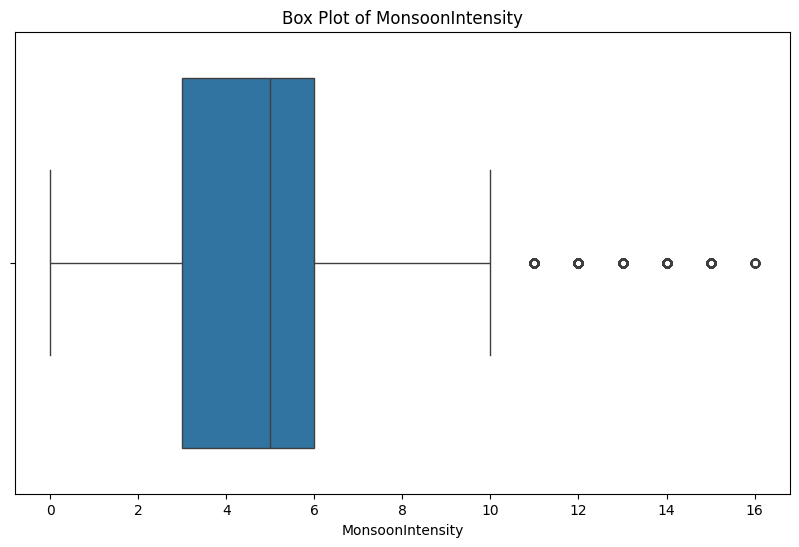

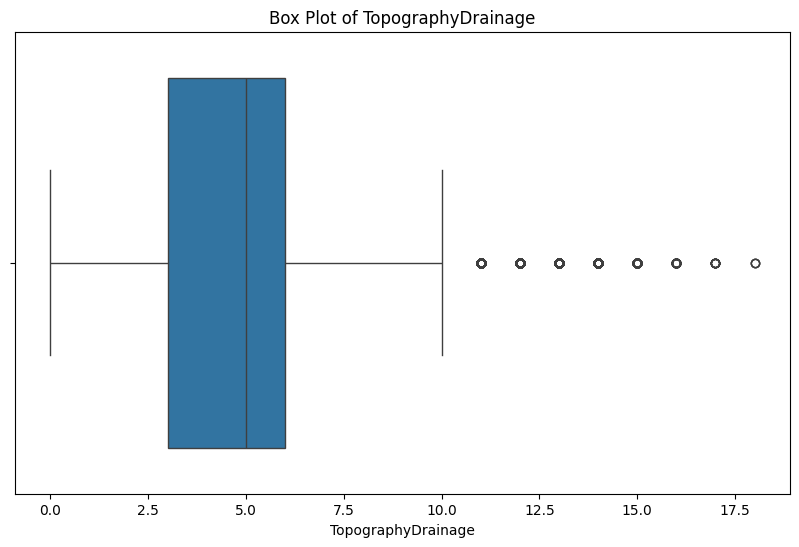

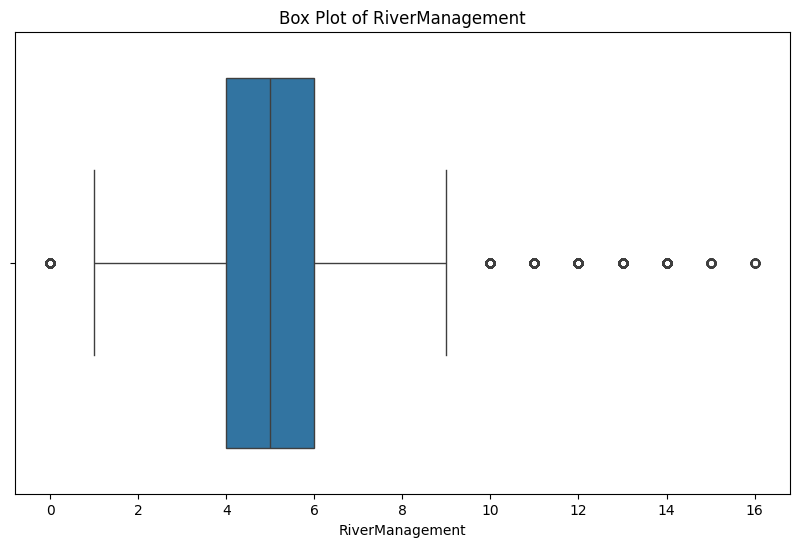

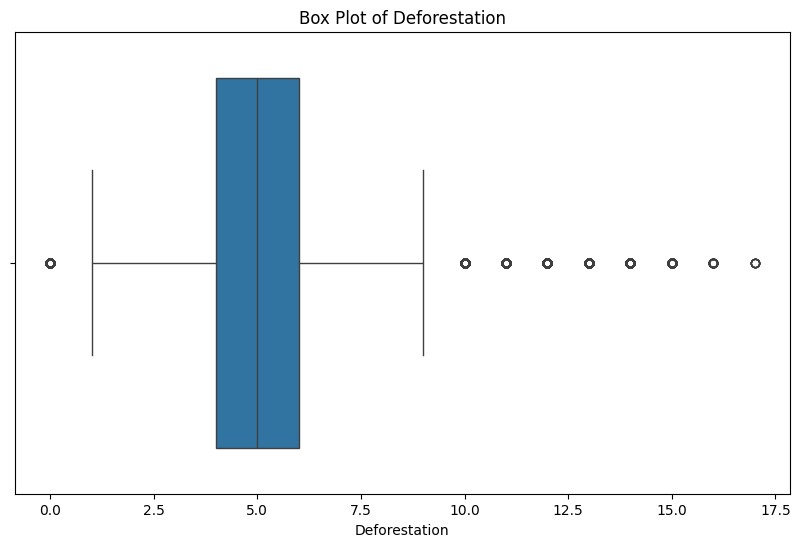

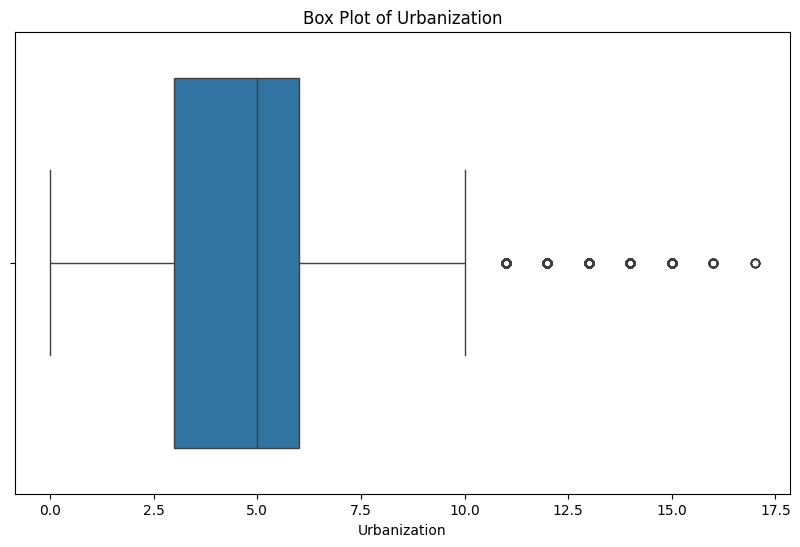

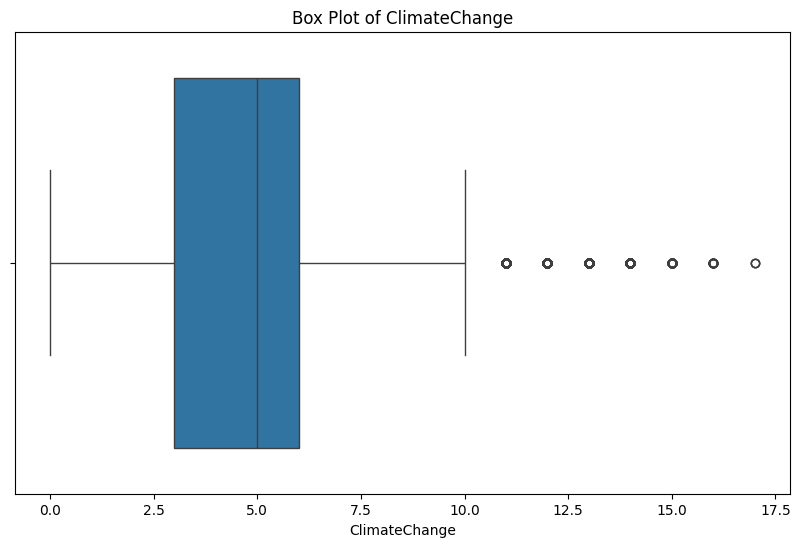

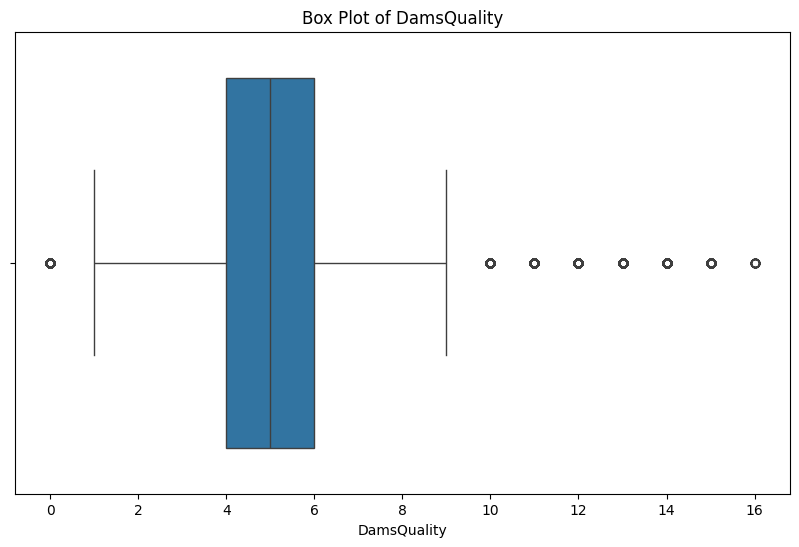

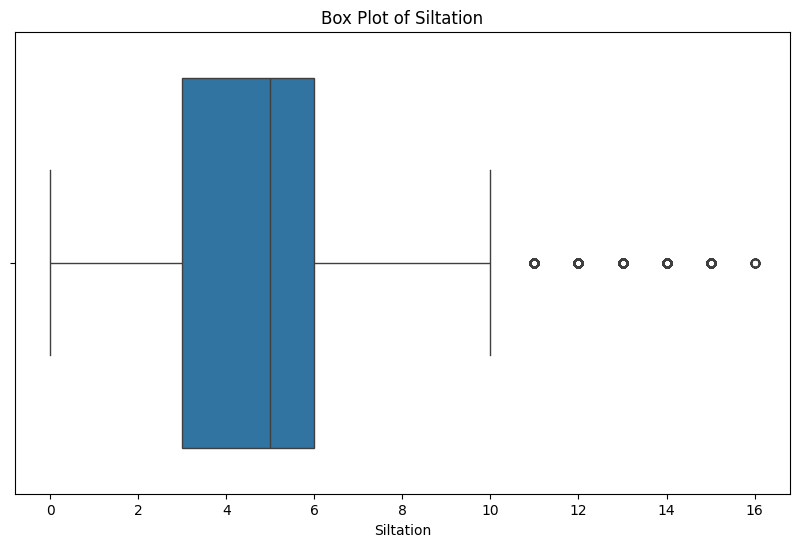

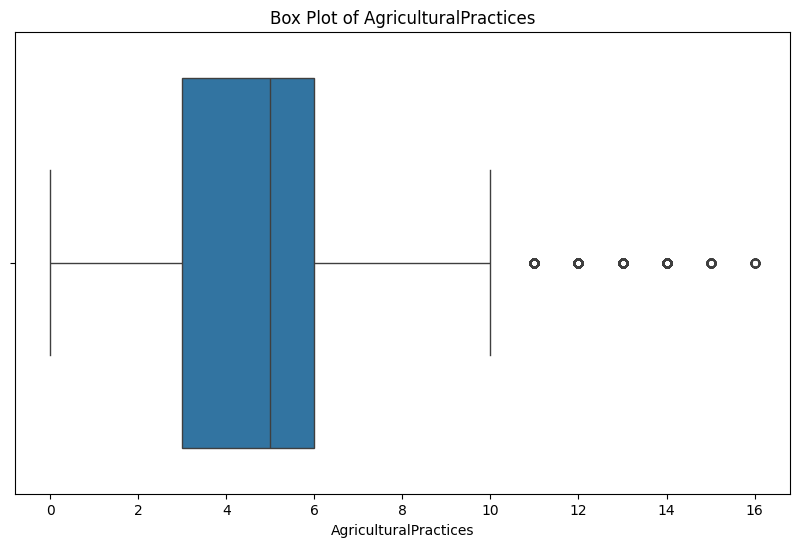

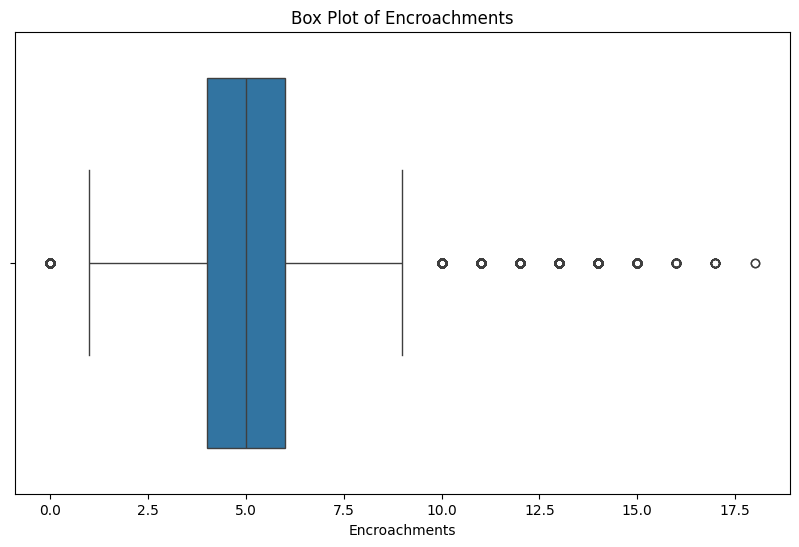

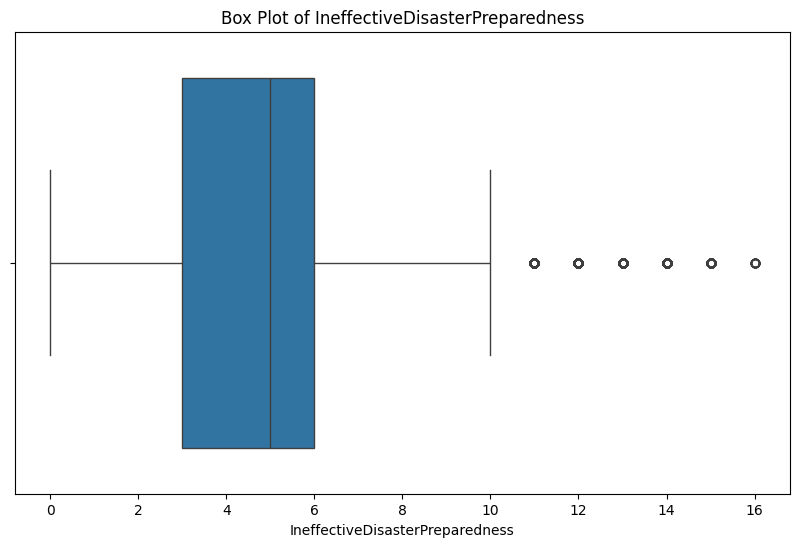

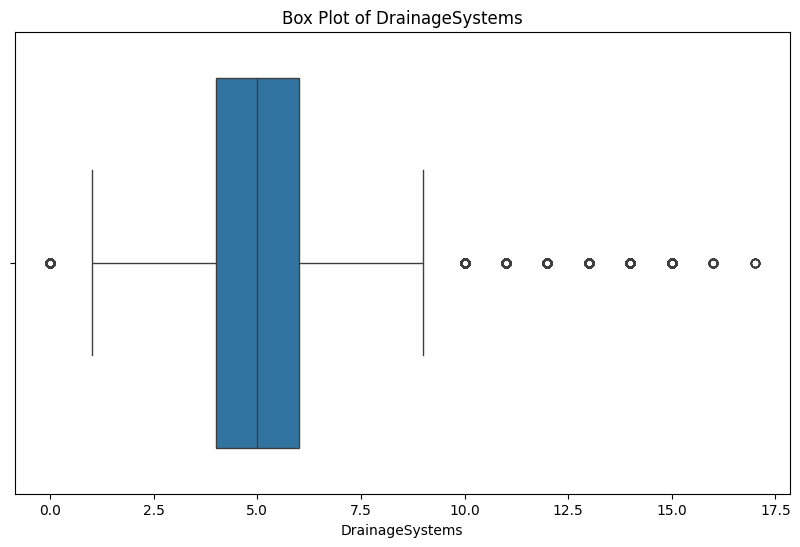

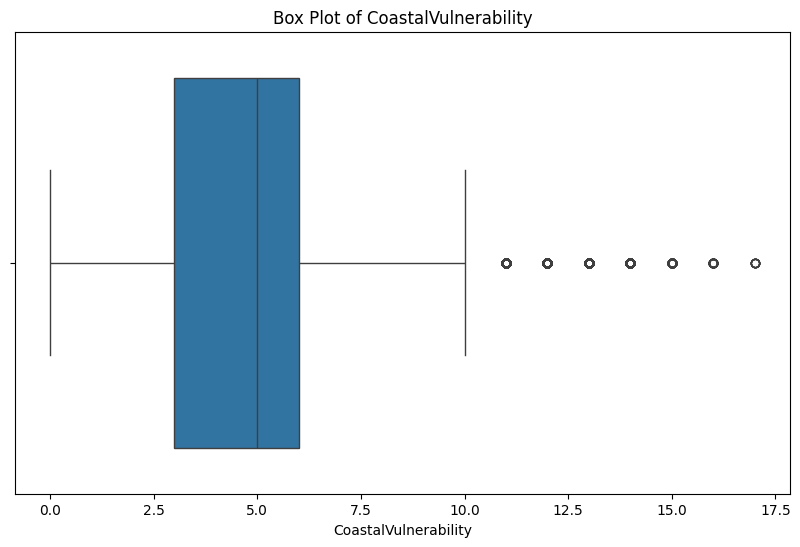

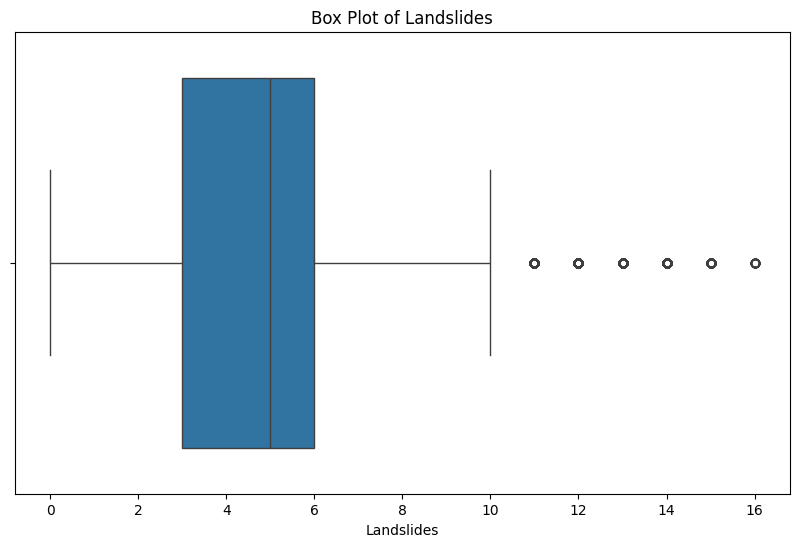

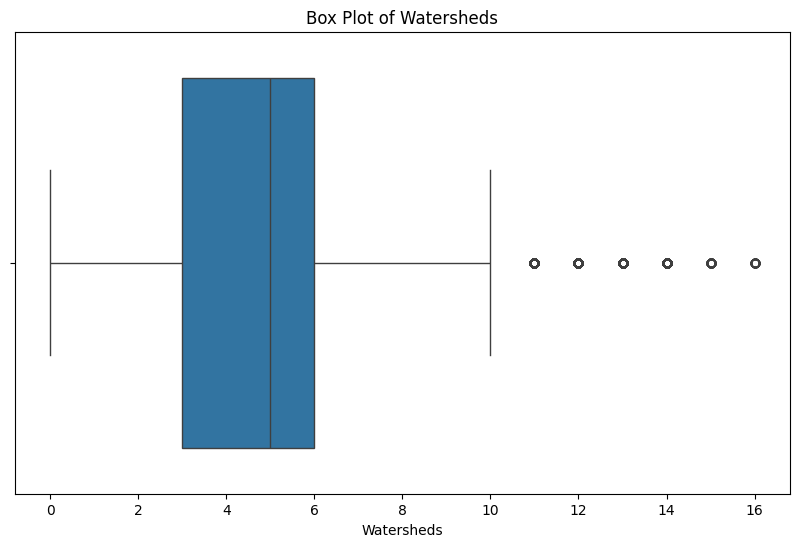

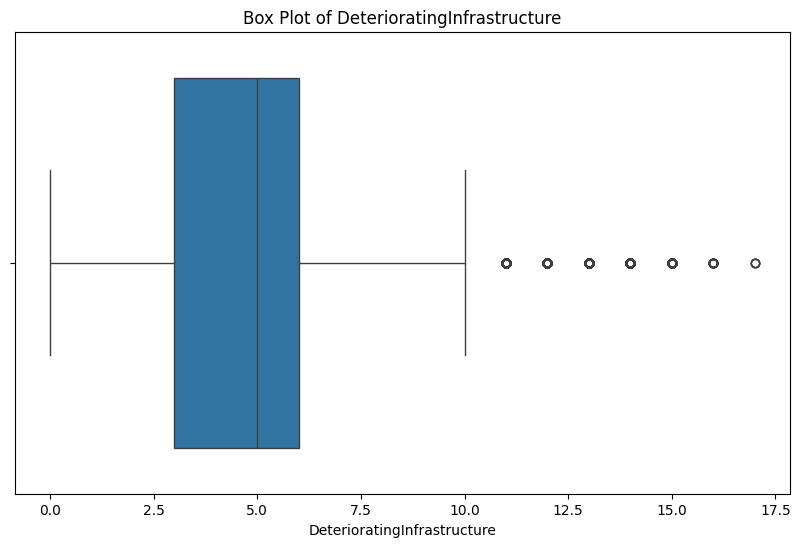

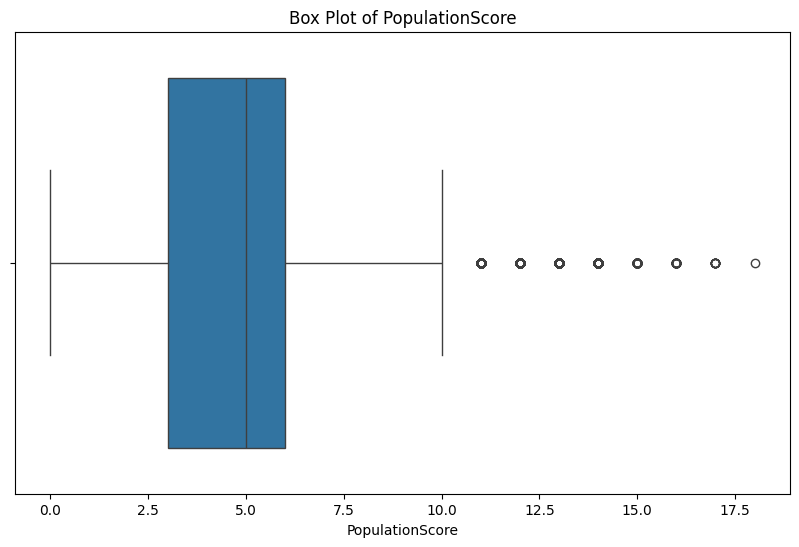

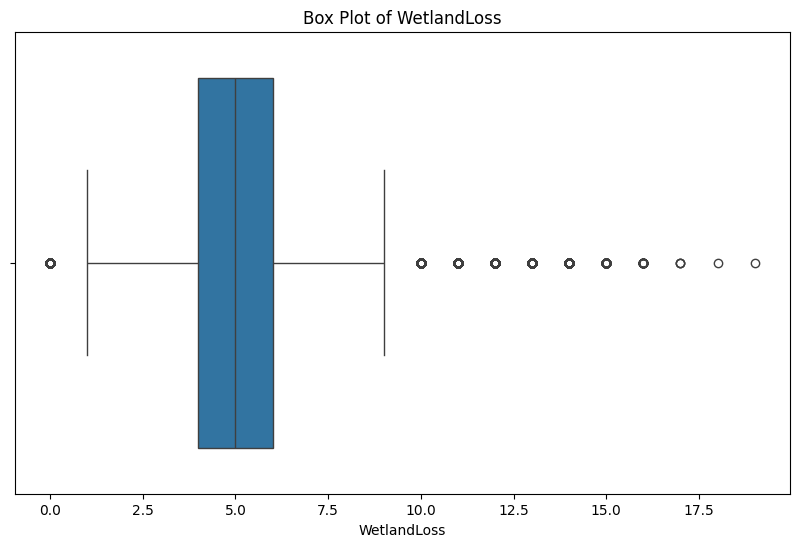

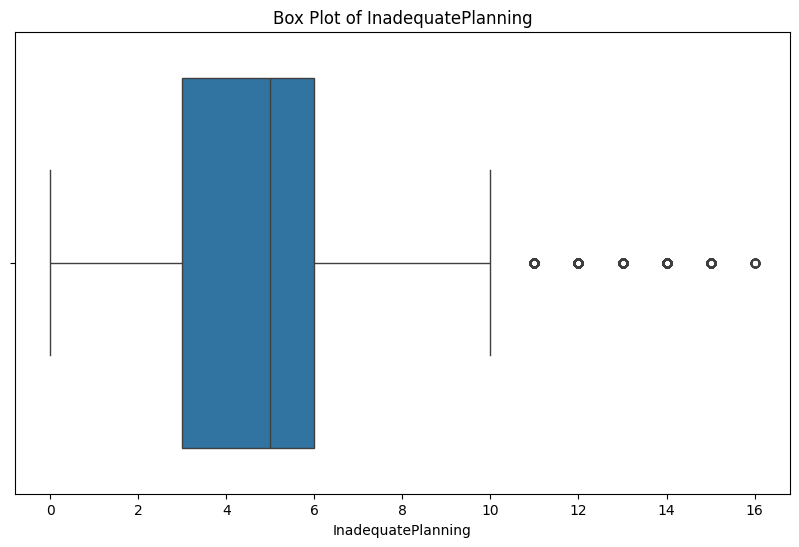

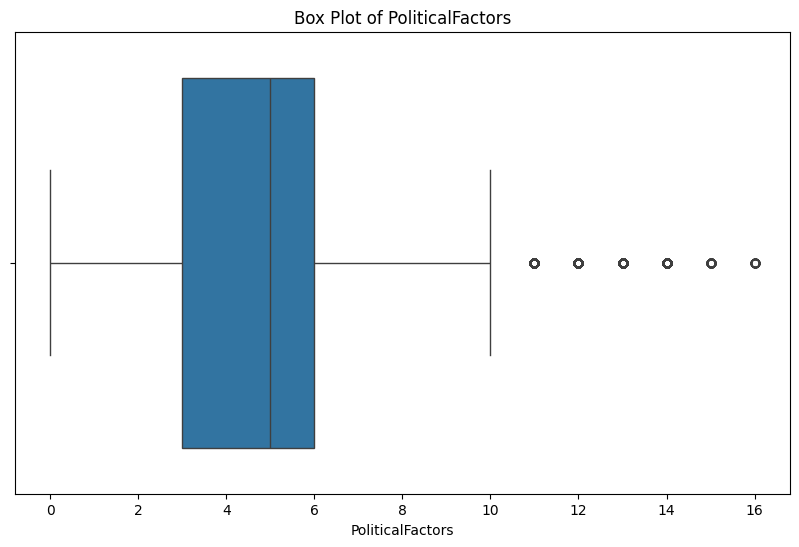

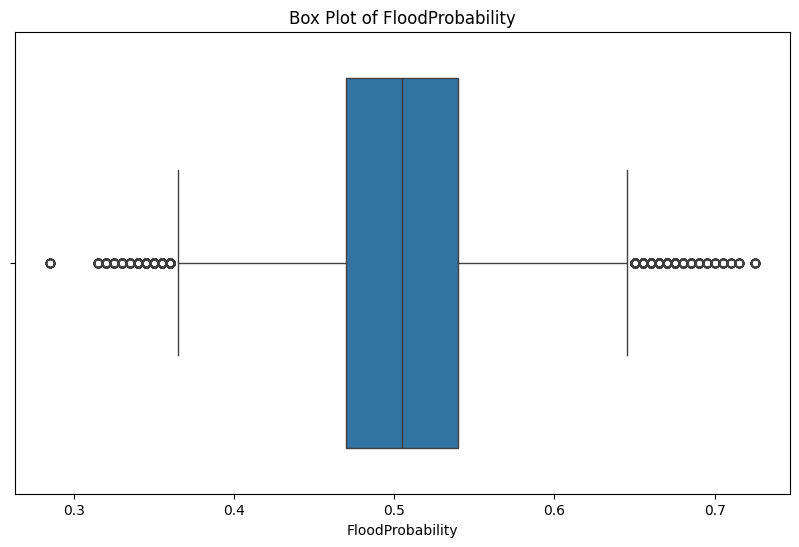

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in df_train.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df_train[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

Perhatikan visualisasi data di atas, nilai yang berada di bawah batas minimum atau di atas batas maksimum dianggap sebagai outlier. Ada dua pilihan yang biasa dilakukan untuk mengatasi permasalahan ini.

1. Anda dapat memilih untuk menghapus outlier.
2. Menggantinya dengan nilai yang lebih moderat (seperti batas terdekat), atau menerapkan transformasi.

 untuk menghapus data outlier dengan asumsi bahwa outlier yang terjadi merupakan human error dan tidak ada pengaruh yang besar pada analisis deskriptif. Mari kita mulai pemeriksaan outlier menggunakan metode IQR

In [21]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

#Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]


# for feature in df_train.columns:
#   plt.figure(figsize=(10, 6))
#   sns.boxplot(x=df_train[feature])
#   plt.title(f'Box Plot of {feature}')
#   plt.show()

ketika melakukan analisis deskriptif di awal ada beberapa hal yang menarik seperti distribusi data yang berbeda, standar deviasi yang masih besar, hingga rentang data yang berbeda-beda. Nah, untuk mengatasi permasalahan tersebut, mari kita lakukan standardisasi pada data agar dapat mengoptimalkan proses pelatihannya kelak.

Berhubung seluruh tipe data yang ada pada dataset ini numerikal maka Anda tidak perlu melakukan transformasi atau pengubahan tipe data. Sehingga, pada tahapan standardisasi, kita bisa langsung memanggil library andalan, yaitu **StandardScaler.**

In [25]:
from sklearn.preprocessing import StandardScaler

# Memastikan hanya data dengan tipe numerikal yang akan diproses
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features


# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Standardisasi penting untuk memastikan bahwa semua fitur dalam dataset memiliki skala yang sama sehingga mempermudah model untuk belajar dengan lebih baik dan memberikan hasil yang lebih akurat serta stabil.

In [27]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [id, MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 22 columns]
